In [1]:
# for recall clean df (after EDA)
#%store -r billboard_df_eda 
%store -r merge_unique_numain_df 
%store -r dizio_main

In [2]:
# import for SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# basics
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

#test,train
from sklearn.model_selection import train_test_split

#balance dataset
from imblearn.over_sampling import SMOTE

#

In [4]:
merge_unique_numain_df.head(1)

,Performer,Song,spotify_genre,spotify_track_duration_minute,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere,User
SongID,,,,,,,,,,,,,,,,,,,,,
-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],3.43,unknown,single,0.59,0.57,5.37,-9.97,...,0.07,0.4,0.08,0.2,0.63,117.76,3.89,22.16,2,2


In [5]:
merge_unique_numain_df.maingenere.value_counts()

maingenere
0     7546
1     5156
2     4163
3     2499
4     2227
5     2195
6      602
7      404
8      397
9      351
10     346
11     307
12     304
13     240
14     178
15     156
16     136
Name: count, dtype: int64

# things to do before SVM

In [6]:
#make list of maingenere top 17 (more than 100 songs)
#list_top_17 = list(merge_unique_numain_df.maingenere.value_counts()[:17].index)
#list(list_top_17.index)
#list_top_17

In [7]:
#df_17maingenre=billboard_df[billboard_df.maingenere.value_counts()[:17]]
#df_17maingenre.head(5)
#df_maingenere_more_100 = merge_unique_numain_df[merge_unique_numain_df.maingenere.isin(list_top_17)]
#billboard_df.maingenere[genere_more_100]
#display(df_maingenere_more_100.maingenere.value_counts())

In [8]:
# df with only the 17 meingenre 
#df_maingenere_more_100.info()

## **We want to classify the songs using SVM** 

In [3]:
# First we have to identify the features
#features=merge_unique_numain_df[['danceability','energy','key','loudness','mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence','time_signature','tempo','spotify_track_duration_minute']]
#target=merge_unique_numain_df.maingenere
# now we have to define our TARGET (what we are interested in) --> OUTPUT
#new_target='valence'

features = ['spotify_track_duration_minute', 'danceability', 'energy', 'loudness','mode', 'speechiness', 'acousticness', 'maingenere',
    'spotify_track_popularity', 'instrumentalness', 'liveness']

target = ['maingenere']

x = merge_unique_numain_df[features]
y = merge_unique_numain_df[target]

display(x)
display(y)

,spotify_track_duration_minute,danceability,energy,loudness,mode,speechiness,acousticness,maingenere,spotify_track_popularity,instrumentalness,liveness
SongID,,,,,,,,,,,
-twistin'-White Silver SandsBill Black's Combo,3.43,0.590,0.570,-9.970,0.75,0.0700,0.40000,2,22.16,0.080000,0.2000
¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,3.43,0.590,0.570,-9.970,0.75,0.0700,0.40000,2,22.16,0.080000,0.2000
......And Roses And RosesAndy Williams,2.77,0.154,0.185,-14.063,1.00,0.0315,0.91100,0,38.00,0.000267,0.1120
...And Then There Were DrumsSandy Nelson,2.87,0.588,0.672,-17.278,0.00,0.0361,0.00256,1,11.00,0.745000,0.1450
...Baby One More TimeBritney Spears,3.52,0.759,0.699,-5.745,0.00,0.0307,0.20200,0,77.00,0.000131,0.4430
...,...,...,...,...,...,...,...,...,...,...,...
ZombieBad Wolves,4.25,0.448,0.826,-3.244,0.00,0.0319,0.00756,11,74.00,0.000000,0.1170
ZoomFuture,4.64,0.852,0.438,-7.673,1.00,0.4260,0.01450,4,51.00,0.000000,0.2630
ZoomLil' Boosie Featuring Yung Joc,3.79,0.730,0.650,-6.750,0.57,0.2100,0.15000,4,60.30,0.010000,0.2000


,maingenere
SongID,
-twistin'-White Silver SandsBill Black's Combo,2
¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,2
......And Roses And RosesAndy Williams,0
...And Then There Were DrumsSandy Nelson,1
...Baby One More TimeBritney Spears,0
...,...
ZombieBad Wolves,11
ZoomFuture,4
ZoomLil' Boosie Featuring Yung Joc,4


In [4]:
# standardize the variables before use it
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [5]:
#split the data set
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [12]:
display(x_train)
display(y_test['maingenere'].value_counts())

array([[-0.14473975,  0.00902747,  0.02729593, ...,  0.22083088,
        -0.19085704, -0.01855361],
       [-0.2296733 , -0.06096697, -0.24138354, ..., -0.8356171 ,
         0.36975498,  0.04893334],
       [ 0.11006089, -0.51593086,  0.97304766, ..., -0.79624636,
        -0.27094448,  5.17794171],
       ...,
       [-1.50367651, -0.83790531, -1.06891632, ...,  1.73472926,
        -0.27080833, -0.50445966],
       [-0.7109634 , -0.18695697,  1.2578479 , ..., -0.8899862 ,
         1.01045444, -0.07929187],
       [ 0.2516168 , -0.63492142,  1.1073874 , ...,  0.79733088,
        -0.27094448,  0.83178199]])

maingenere
0     1491
1     1040
2      818
3      523
5      463
4      437
6      133
7       86
9       74
8       69
10      61
12      57
11      52
13      48
14      41
15      25
16      24
Name: count, dtype: int64

In [13]:
# try with the first SVM
svm = SVC(kernel='rbf',C=1) 
# we use the RADIAL BASICS FUNTION as a kernel
# C is our regualization parameter

# we initialize the SVM
svm.fit(x_train, y_train)

c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1)

In [14]:
# in order to make prediction --> da vedere meglio 
y_pred=svm.predict(x_test)

In [15]:
print(classification_report(y_test, y_pred, target_names=dizio_main))

              precision    recall  f1-score   support

         pop       1.00      0.99      0.99      1491
        rock       0.99      0.98      0.99      1040
       other       0.95      0.99      0.97       818
        soul       0.98      0.96      0.97       523
         rap       0.97      0.98      0.98       437
     country       0.98      0.98      0.98       463
       disco       0.81      0.92      0.86       133
        jazz       0.74      0.59      0.66        86
       blues       0.73      0.75      0.74        69
        funk       0.78      0.78      0.78        74
       dance       0.82      0.74      0.78        61
       metal       0.91      0.81      0.86        52
        folk       0.84      0.82      0.83        57
       house       0.71      0.81      0.76        48
       indie       0.73      0.59      0.65        41
         r&b       0.64      0.56      0.60        25
       latin       0.74      0.83      0.78        24

    accuracy              

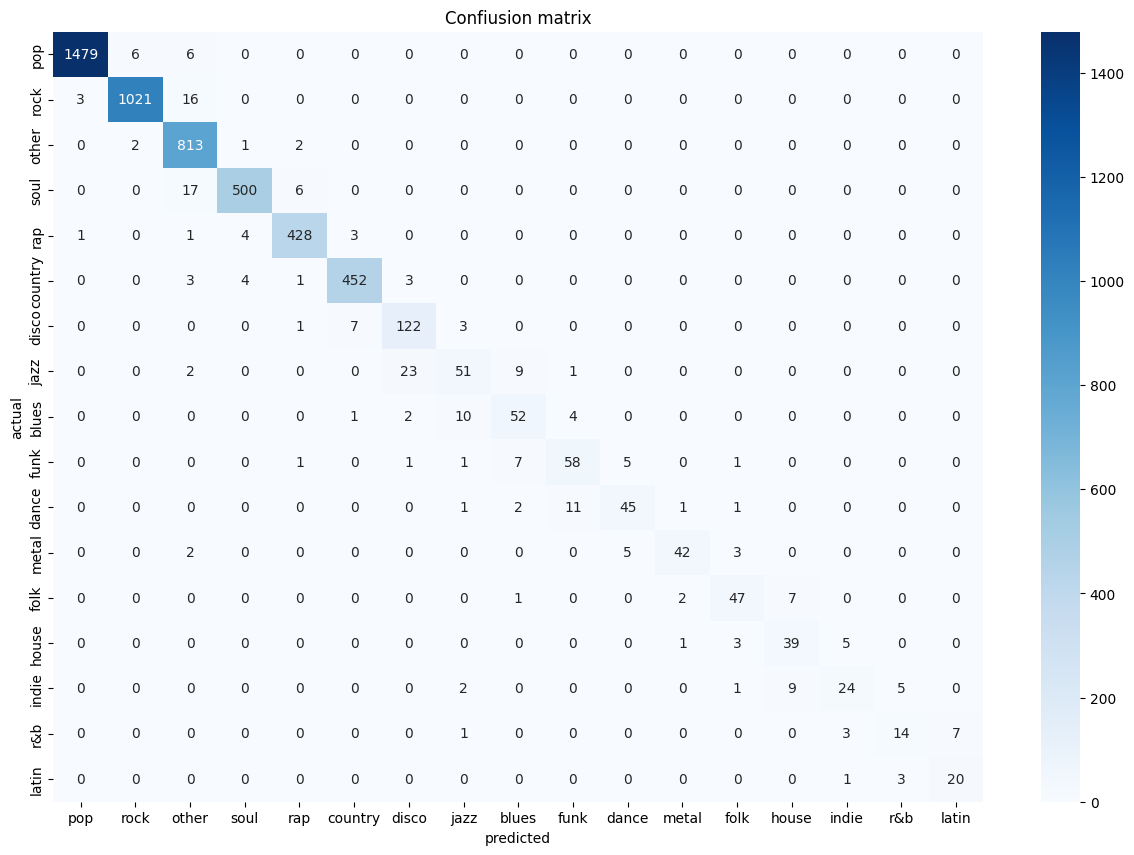

In [16]:
# confiusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (15,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dizio_main, yticklabels=dizio_main)
plt.title('Confiusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

like we have see from the f-1 score more data we have for a maingenere more it will be precise so we try to bilance the data set

# balancing technique SVM

In [17]:
from collections import Counter #is use for verifie balancing

In [18]:
smote = SMOTE(random_state=42)
x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)


In [19]:
svm_balance = SVC(kernel='rbf',C=1) 
# we use the RADIAL BASICS FUNTION as a kernel
# C is our regualization parameter

# we initialize the SVM
svm_balance.fit(x_train_bal, y_train_bal)

c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1)

In [20]:
y_pred_bal = svm_balance.predict(x_test)

In [21]:
print(classification_report(y_test, y_pred_bal, target_names=dizio_main))

              precision    recall  f1-score   support

         pop       1.00      0.99      1.00      1491
        rock       0.99      0.99      0.99      1040
       other       0.97      1.00      0.98       818
        soul       0.99      0.98      0.99       523
         rap       0.99      0.99      0.99       437
     country       1.00      0.99      0.99       463
       disco       0.95      0.98      0.97       133
        jazz       0.94      0.93      0.94        86
       blues       0.94      0.94      0.94        69
        funk       0.97      0.95      0.96        74
       dance       0.97      0.98      0.98        61
       metal       1.00      0.90      0.95        52
        folk       0.93      1.00      0.97        57
       house       0.98      0.98      0.98        48
       indie       0.95      0.90      0.93        41
         r&b       0.96      0.92      0.94        25
       latin       1.00      1.00      1.00        24

    accuracy              

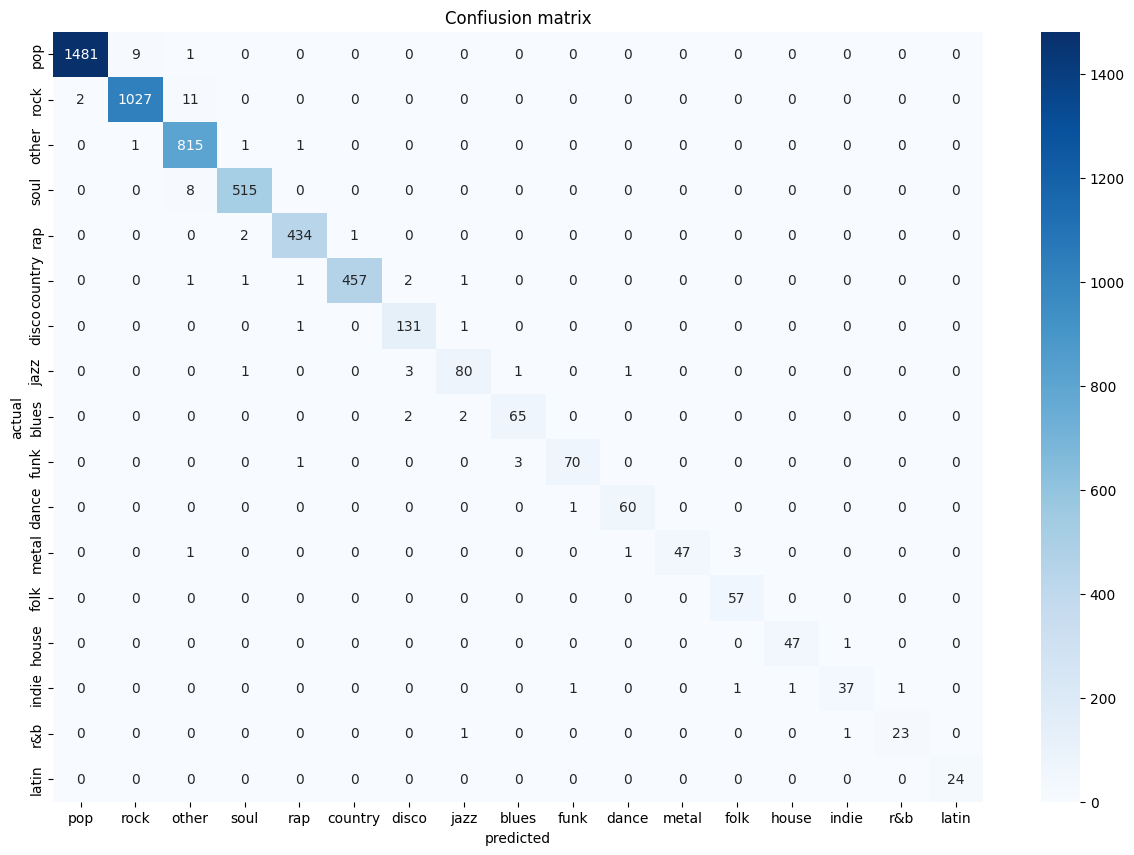

In [24]:
# confiusion matrix
cm_bal = confusion_matrix(y_test, y_pred_bal)

plt.figure(figsize = (15,10))
sns.heatmap(cm_bal, annot=True, fmt='d', cmap='Blues', xticklabels=dizio_main, yticklabels=dizio_main)
plt.title('Confiusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
# Dimensionality reduction with t-SNE for visualization --> in order to plot it and see the results
# since we have many features, visualizing them directly can be difficult

# t-SNE helps reduce the dimensionality to 2D or 3D for plotting
#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA RIGUARDARE
tsne = TSNE(n_components=2, random_state=42) # Reduce to 2 dimensions
reduced_features = tsne.fit_transform(scaled_features)

In [12]:
# used to convert categorical labels (like genre names in your case) into numerical labels that can be used for visualization 
# use for visualize in the point next

#le = LabelEncoder()
#numerical_labels = le.fit_transform(prediction)

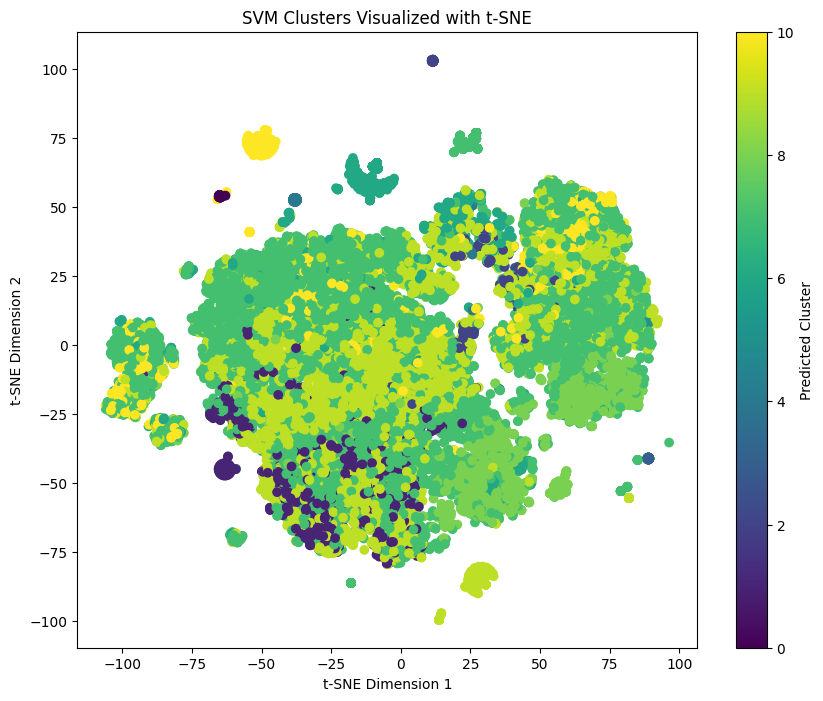

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=numerical_labels,cmap='viridis')
plt.title('SVM Clusters Visualized with t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Predicted Cluster')
plt.show()
